In [1]:
#import packages 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

#import more packages
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [3]:
#load data
df = pd.read_csv('medical_clean.csv',encoding='latin-1')

df

df.describe() 


,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [4]:
#drop complicating variables
df = df.drop(['City'], axis=1)
df = df.drop(['State'], axis=1)
df = df.drop(['County'], axis=1)
df = df.drop(['TimeZone'], axis=1)
df = df.drop(['Job'], axis=1)
df = df.drop(['Lng'], axis=1)
df = df.drop(['Lat'], axis=1)
df = df.drop(['Zip'], axis=1)


In [5]:
#transform boolean data 
Booleate = pd.get_dummies(df[['Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Reflux_esophagitis', 'Asthma', 'HighBlood', 'Overweight','ReAdmis','Soft_drink','Stroke','Anxiety', 'Allergic_rhinitis']])

df = pd.concat((df,Booleate), axis=1)

df= df.drop(['Arthritis'], axis=1)
df= df.drop(['Diabetes'], axis=1)
df= df.drop(['Hyperlipidemia'], axis=1)
df = df.drop(['BackPain'], axis=1)
df = df.drop(['Reflux_esophagitis'], axis=1)
df = df.drop(['Asthma'], axis=1)
df = df.drop(['HighBlood'], axis=1)
df = df.drop(['Overweight'], axis=1)
df = df.drop(['ReAdmis'], axis=1)
df = df.drop(['Soft_drink'], axis=1)
df = df.drop(['Stroke'], axis=1)
df = df.drop(['Anxiety'], axis=1)
df = df.drop(['Allergic_rhinitis'], axis=1)
df = df.drop(['Arthritis_No'], axis=1)
df = df.drop(['Diabetes_No'], axis=1)
df = df.drop(['Hyperlipidemia_No'], axis=1)
df = df.drop(['BackPain_No'], axis=1)
df = df.drop(['Reflux_esophagitis_No'], axis=1)
df = df.drop(['Asthma_No'], axis=1)
df = df.drop(['HighBlood_No'], axis=1)
df = df.drop(['Overweight_No'], axis=1)
df = df.drop(['ReAdmis_No'], axis=1)
df = df.drop(['Soft_drink_No'], axis=1)
df = df.drop(['Stroke_No'], axis=1)
df = df.drop(['Anxiety_No'], axis=1)
df = df.drop(['Allergic_rhinitis_No'], axis=1)

df = df.rename(columns={"Arthritis_Yes":"Arthritis"})
df = df.rename(columns={"Diabetes_Yes":"Diabetes"})
df = df.rename(columns={"Hyperlipidemia_Yes":"Hyperlipidemia"})
df = df.rename(columns={"BackPain_Yes":"BackPain"})
df = df.rename(columns={"Reflux_esophagitis_Yes":"Reflux_esophagitis"})
df = df.rename(columns={"Asthma_Yes":"Asthma"})
df = df.rename(columns={"Reflux_esophagitis_Yes":"Reflux_esophagitis"})
df = df.rename(columns={"Asthma_Yes":"Asthma"})
df = df.rename(columns={"HighBlood_Yes":"HighBlood"})
df = df.rename(columns={"Overweight_Yes":"Overweight"})
df = df.rename(columns={"ReAdmis_Yes":"ReAdmis"})
df = df.rename(columns={"Soft_drink_Yes":"Soft_drink"})
df = df.rename(columns={"Stroke_Yes":"Stroke"})
df = df.rename(columns={"Anxiety_Yes":"Anxiety"})
df = df.rename(columns={"Allergic_rhinitis_Yes":"Allergic_rhinitis"})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Population          10000 non-null  int64  
 1   Area                10000 non-null  object 
 2   Children            10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Income              10000 non-null  float64
 5   Marital             10000 non-null  object 
 6   Gender              10000 non-null  object 
 7   VitD_levels         10000 non-null  float64
 8   Doc_visits          10000 non-null  int64  
 9   Full_meals_eaten    10000 non-null  int64  
 10  vitD_supp           10000 non-null  int64  
 11  Initial_admin       10000 non-null  object 
 12  Complication_risk   10000 non-null  object 
 13  Services            10000 non-null  object 
 14  Initial_days        10000 non-null  float64
 15  TotalCharge         10000 non-null  float64
 16  Addit

In [6]:
# create dummy variables 
dummies= pd.get_dummies(df[["Area","Marital","Gender","Initial_admin","Services","Complication_risk",]])
df = pd.concat([df, dummies], axis=1)

df = df.drop(['Area'], axis=1)
df = df.drop(['Marital'], axis=1)
df = df.drop(['Gender'], axis=1)
df = df.drop(['Initial_admin'], axis=1)
df = df.drop(['Services'], axis=1)
df = df.drop(['Complication_risk'], axis=1)


In [7]:
#drop k-1 dummy variables
df = df.drop(['Area_Rural'], axis=1)
df = df.drop(['Marital_Never Married'], axis=1)
df = df.drop(['Gender_Female'], axis=1)
df = df.drop(['Initial_admin_Elective Admission'], axis=1)
df = df.drop(['Services_Blood Work'], axis=1)
df = df.drop(['Complication_risk_Low'], axis=1)


In [8]:
# transform variables
df['Population'] = df['Population'].astype(float)
df['Children'] = df['Children'].astype(float)
df['Age'] = df['Age'].astype(float)
df['Doc_visits'] = df['Doc_visits'].astype(float)
df['Full_meals_eaten'] = df['Full_meals_eaten'].astype(float)
df['vitD_supp'] = df['vitD_supp'].astype(float)
df['Item1'] = df['Item1'].astype(float)
df['Item2'] = df['Item2'].astype(float)
df['Item3'] = df['Item3'].astype(float)
df['Item4'] = df['Item4'].astype(float)
df['Item5'] = df['Item5'].astype(float)
df['Item6'] = df['Item6'].astype(float)
df['Item7'] = df['Item7'].astype(float)
df['Item8'] = df['Item8'].astype(float)
df['Area_Suburban'] = df['Area_Suburban'].astype(float)
df['Area_Urban'] = df['Area_Urban'].astype(float)
df['Marital_Divorced'] = df['Marital_Divorced'].astype(float)
df['Marital_Married'] = df['Marital_Married'].astype(float)
df['Marital_Separated'] = df['Marital_Separated'].astype(float)
df['Marital_Widowed'] = df['Marital_Widowed'].astype(float)
df['Gender_Male'] = df['Gender_Male'].astype(float)
df['Gender_Nonbinary'] = df['Gender_Nonbinary'].astype(float)
df['Initial_admin_Emergency Admission'] = df['Initial_admin_Emergency Admission'].astype(float)
df['Initial_admin_Observation Admission'] = df['Initial_admin_Observation Admission'].astype(float)
df['Services_CT Scan'] = df['Services_CT Scan'].astype(float)
df['Services_Intravenous'] = df['Services_Intravenous'].astype(float)
df['Services_MRI'] = df['Services_MRI'].astype(float)
df['Complication_risk_High'] = df['Complication_risk_High'].astype(float)
df['Complication_risk_Medium'] = df['Complication_risk_Medium'].astype(float)

df['HighBlood'] = df['HighBlood'].astype('float')
df['Stroke'] = df['Stroke'].astype('float')
df['Overweight'] = df['Overweight'].astype('float')
df['Arthritis'] = df['Arthritis'].astype('float')
df['Diabetes'] = df['Diabetes'].astype('float')
df['Hyperlipidemia'] = df['Hyperlipidemia'].astype('float')
df['BackPain'] = df['BackPain'].astype('float')
df['Anxiety'] = df['Anxiety'].astype('float')
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].astype('float')
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].astype('float')
df['Asthma'] = df['Asthma'].astype('float')
df['ReAdmis'] = df['ReAdmis'].astype('float')
df['Soft_drink'] = df['Soft_drink'].astype('float')
df['Stroke'] = df['Stroke'].astype('float')
df['Anxiety'] = df['Anxiety'].astype('float')
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].astype('float')


array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'VitD_levels'}>,
        <AxesSubplot:title={'center':'Doc_visits'}>,
        <AxesSubplot:title={'center':'Full_meals_eaten'}>],
       [<AxesSubplot:title={'center':'vitD_supp'}>,
        <AxesSubplot:title={'center':'Initial_days'}>,
        <AxesSubplot:title={'center':'TotalCharge'}>,
        <AxesSubplot:title={'center':'Additional_charges'}>,
        <AxesSubplot:title={'center':'Item1'}>,
        <AxesSubplot:title={'center':'Item2'}>,
        <AxesSubplot:title={'center':'Item3'}>],
       [<AxesSubplot:title={'center':'Item4'}>,
        <AxesSubplot:title={'center':'Item5'}>,
        <AxesSubplot:title={'center':'Item6'}>,
        <AxesSubplot:title={'center':'Item7'}>,
        <AxesSubplot:title={'center':'Item8'}>,
        <AxesSubplot:title=

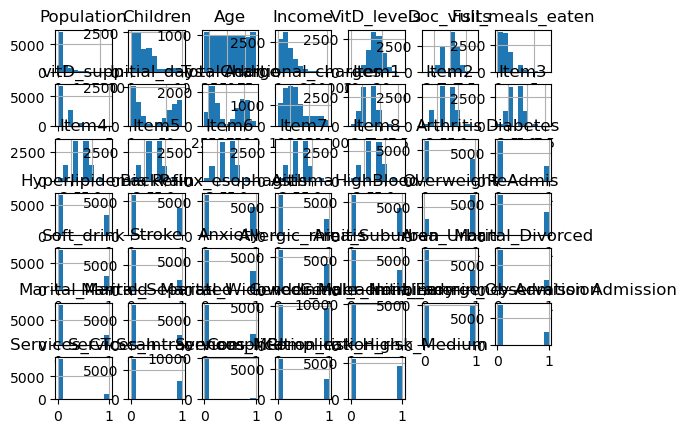

In [9]:
#univariate visualization
df.hist()


array([[<AxesSubplot:title={'center':'Initial_days'}>]], dtype=object)

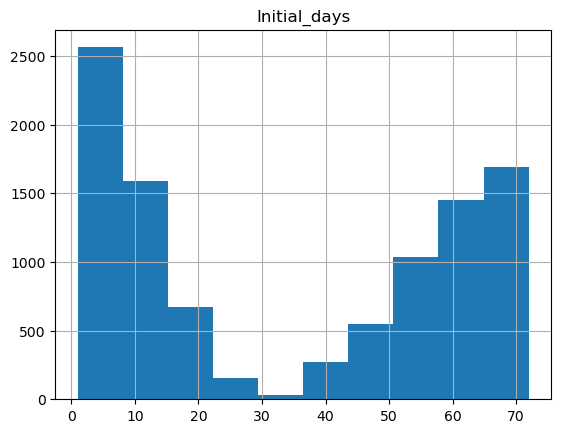

In [10]:
#univariate visualization
df.hist('Initial_days')

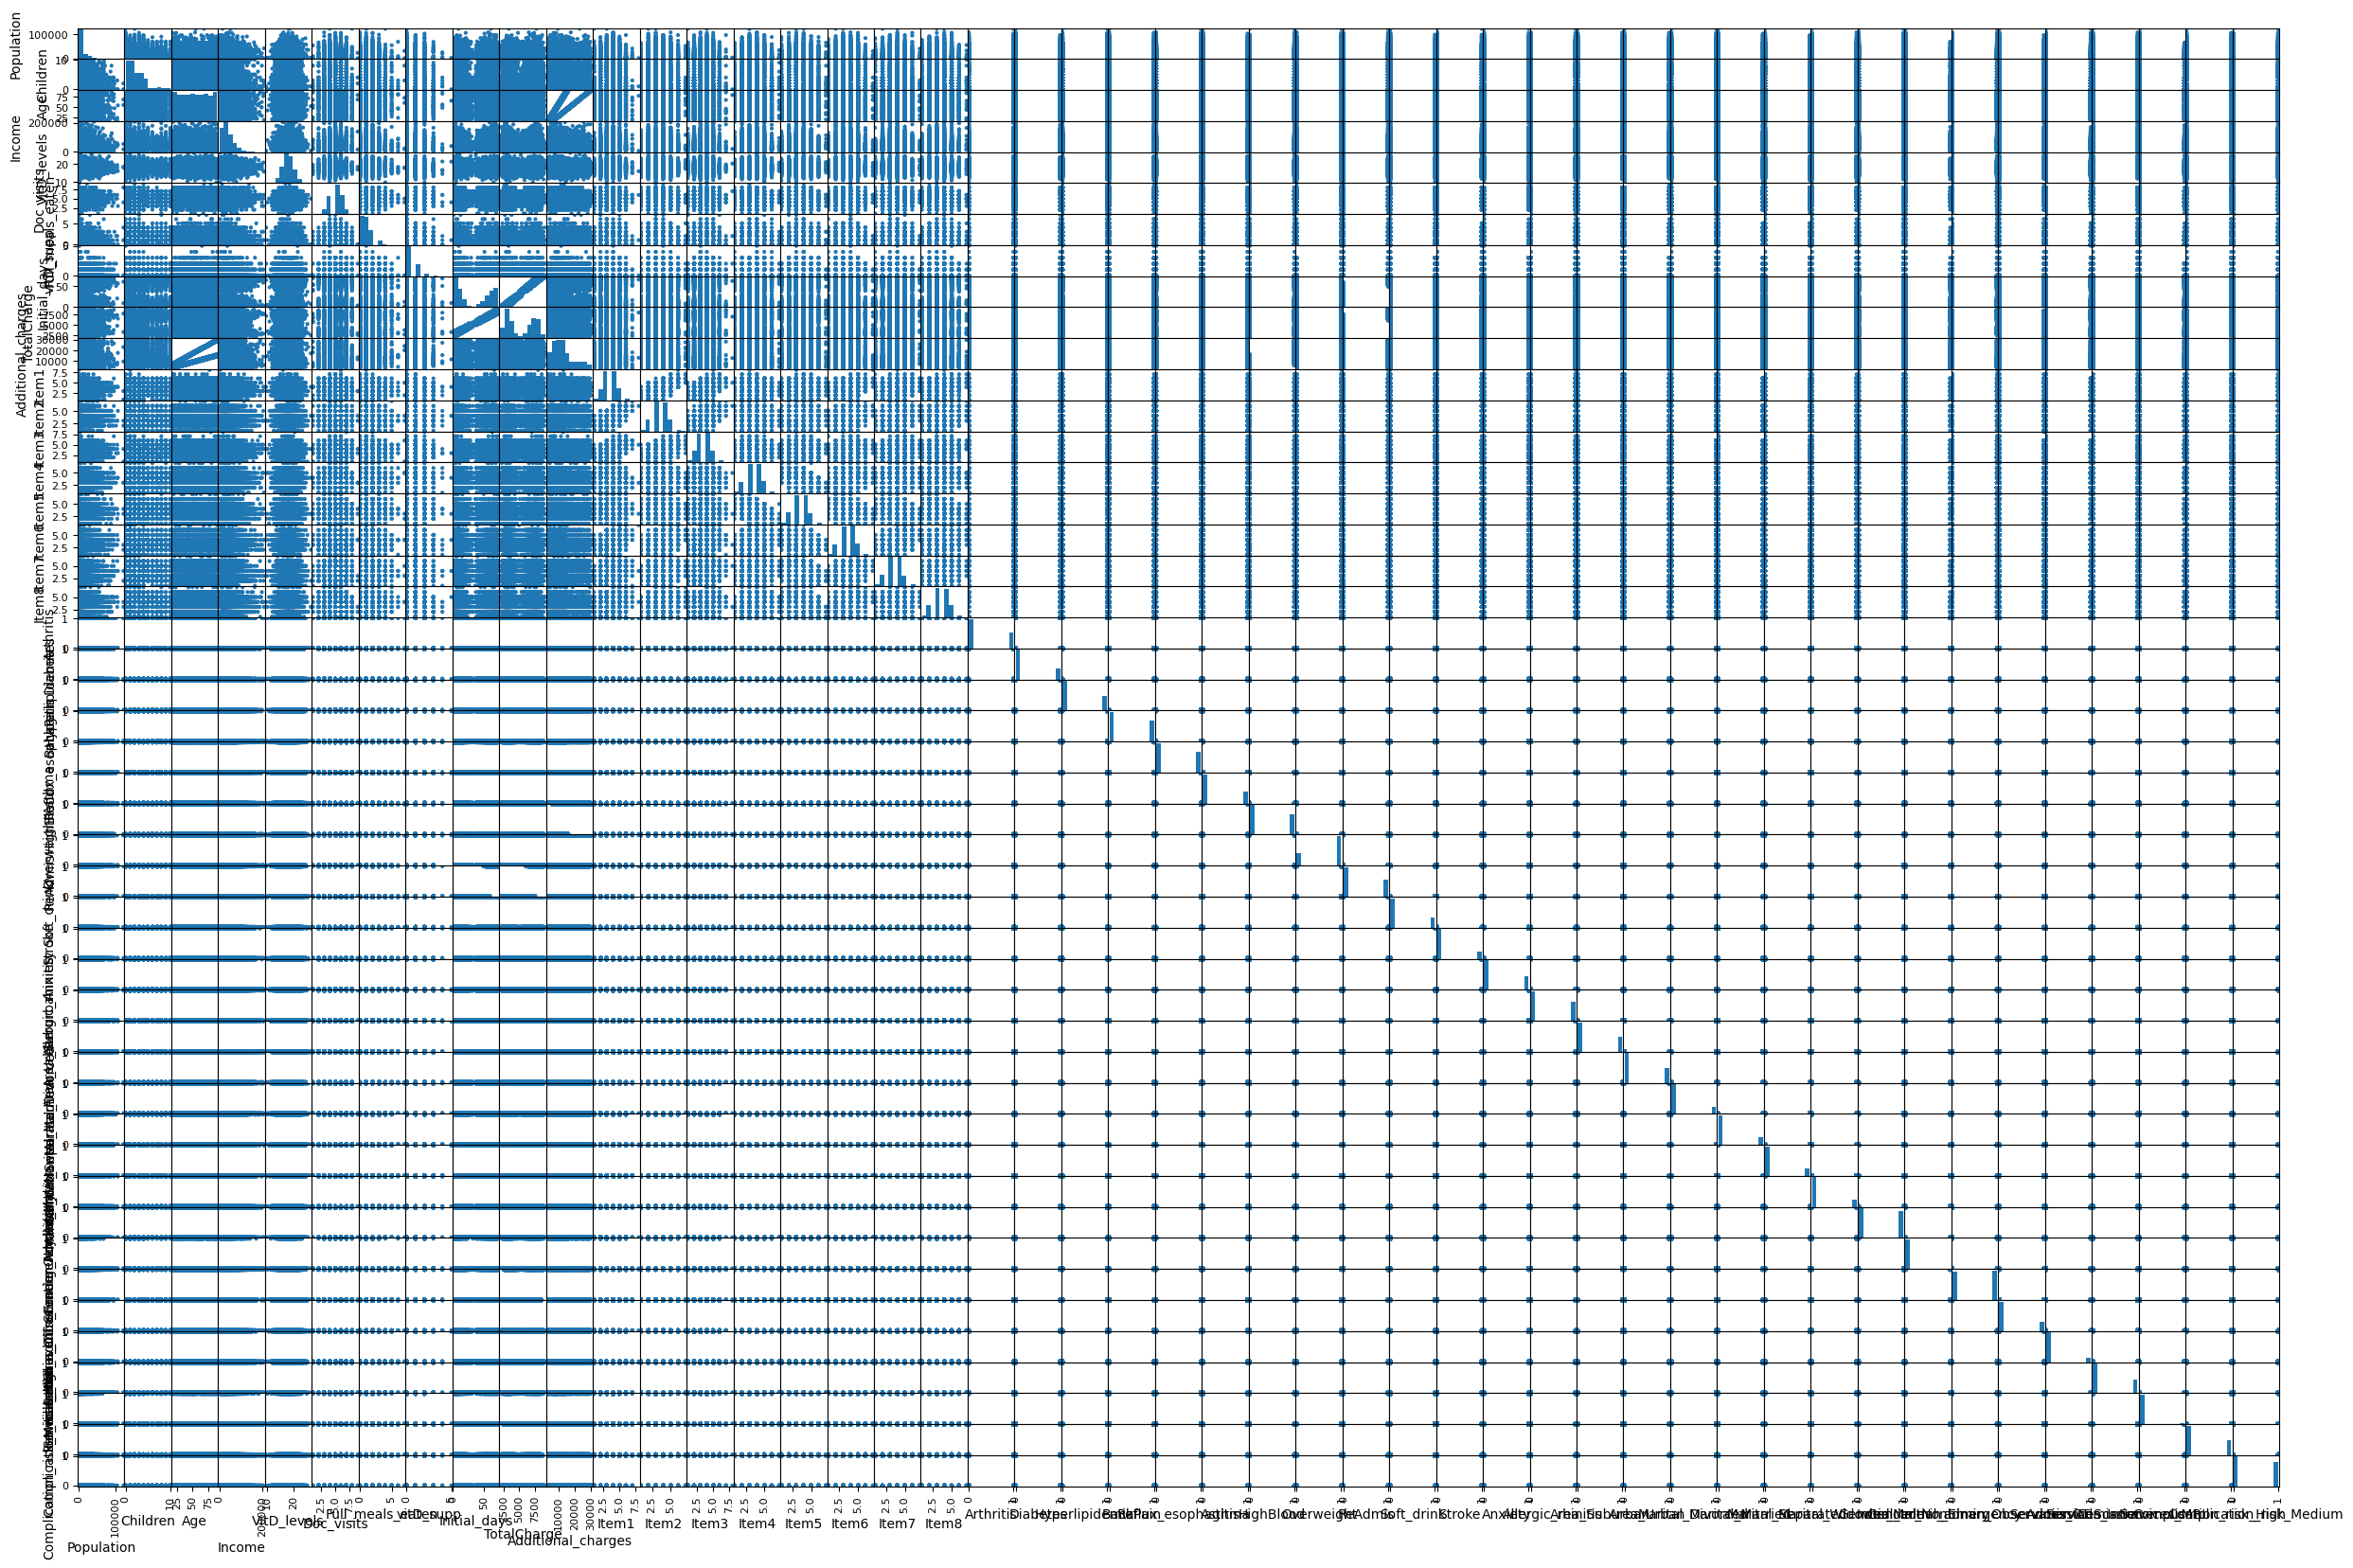

In [11]:
#bivariate visualization 
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))

plt.show()



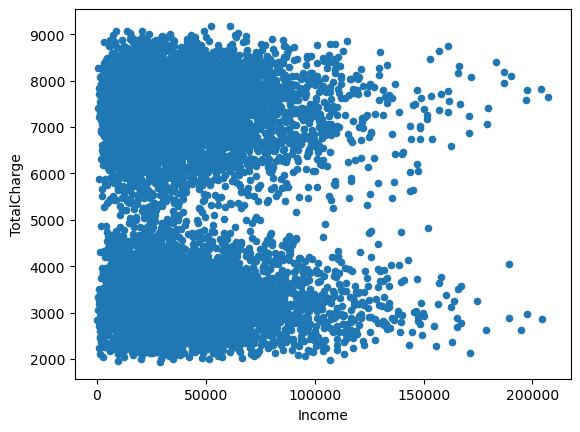

In [12]:
df.plot.scatter(x='Income', y='TotalCharge');

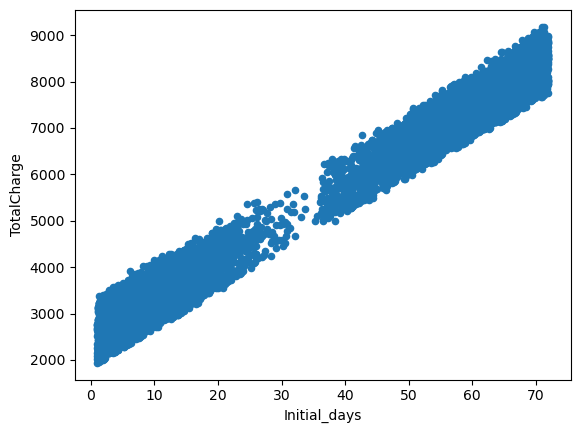

In [13]:
df.plot.scatter(x='Initial_days', y='TotalCharge');

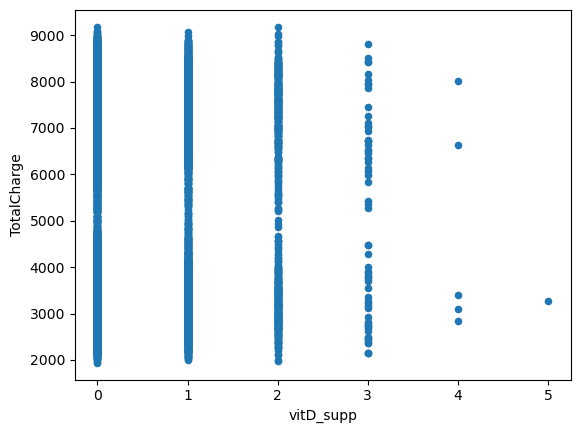

In [14]:
df.plot.scatter(x='vitD_supp', y='TotalCharge');

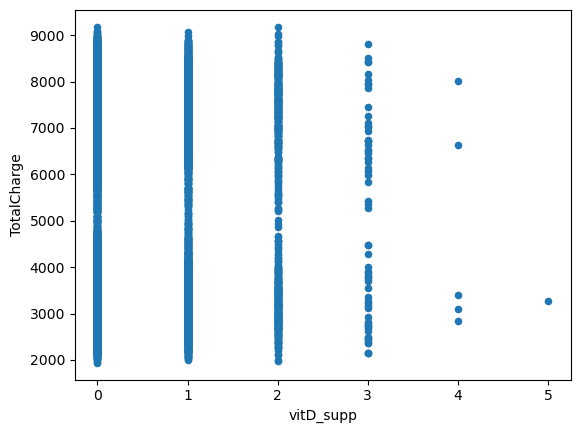

In [15]:
df.plot.scatter(x='vitD_supp', y='TotalCharge');

In [16]:
#define x & y 
x = df.drop('TotalCharge', axis =1)
y= df[['TotalCharge']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)


In [17]:
# create a Linear Regression model object
regression_model = LinearRegression()


In [18]:
# pass through the X_train & y_train data set
regression_model.fit(x_train, y_train)


LinearRegression()

In [20]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)



The intercept for our model is 1.856e+03
----------------------------------------------------------------------------------------------------


In [21]:
# loop through the dictionary and print the data
for coef in zip(x.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))


The Coefficient for Population is 7.9e-11
The Coefficient for Children is -5.2e-07
The Coefficient for Age is -4.1e-07
The Coefficient for Income is 5.7e-11
The Coefficient for VitD_levels is -1.9e-06
The Coefficient for Doc_visits is -3.1e-06
The Coefficient for Full_meals_eaten is 6e-06
The Coefficient for vitD_supp is 9.3e-07
The Coefficient for Initial_days is 8.2e+01
The Coefficient for Additional_charges is 2.2e-09
The Coefficient for Item1 is 7.6e-07
The Coefficient for Item2 is 6.1e-06
The Coefficient for Item3 is -3.9e-06
The Coefficient for Item4 is 4.9e-07
The Coefficient for Item5 is -3.3e-08
The Coefficient for Item6 is -5.5e-07
The Coefficient for Item7 is 1.8e-06
The Coefficient for Item8 is -1.8e-06
The Coefficient for Arthritis is 7.2e+01
The Coefficient for Diabetes is 7.5e+01
The Coefficient for Hyperlipidemia is 9.4e+01
The Coefficient for BackPain is 8.5e+01
The Coefficient for Reflux_esophagitis is 6e+01
The Coefficient for Asthma is 8e-07
The Coefficient for High

In [22]:
# define our intput
X2 = sm.add_constant(x)


In [23]:
# create a OLS model
model = sm.OLS(y, x)


In [24]:
# fit the data
est = model.fit()


In [25]:
# show summary
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            TotalCharge   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.551e+05
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:30:08   Log-Likelihood:                         -62487.
No. Observations:               10000   AIC:                                  1.251e+05
Df Residuals:                    9954   BIC:                                  1.254e+05
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Population                              0.0003   8.48e-05      3.470      0.001       0.000       0.000
Children                                3.0716      0.581      5.291      0.000       1.934       4.210
Age                                     3.2261      0.182     17.685      0.000       2.868       3.584
Income                                  0.0005   4.38e-05     10.848      0.000       0.000       0.001
VitD_levels                            37.2024      0.501     74.315      0.000      36.221      38.184
Doc_visits                             37.4985      1.142     32.822      0.000      35.259      39.738
Full_meals_eaten                        6.4810      1.247      5.198      0.000       4.037       8.925
vitD_supp                               8.1435      1.999      4.073      0.000       4.225      12.062
Initial_days                           82.8781      0.091    913.290      0.000      82.700      83.056
Additional_charges                     -0.0098      0.001    -12.796      0.000      -0.011      -0.008
Item1                                  -5.6616      1.809     -3.130      0.002      -9.207      -2.116
Item2                                   6.0239      1.669      3.610      0.000       2.753       9.295
Item3                                  14.8185      1.535      9.656      0.000      11.810      17.827
Item4                                  46.3414      1.292     35.862      0.000      43.808      48.874
Item5                                  65.4862      1.289     50.789      0.000      62.959      68.014
Item6                                  17.2291      1.483     11.618      0.000      14.322      20.136
Item7                                  21.4521      1.390     15.436      0.000      18.728      24.176
Item8                                  21.8158      1.306     16.707      0.000      19.256      24.375
Arthritis                              84.7300      2.623     32.309      0.000      79.589      89.871
Diabetes                               90.4074      2.819     32.076      0.000      84.883      95.932
Hyperlipidemia                        108.3683      2.658     40.774      0.000     103.158     113.578
BackPain                               97.7127      2.556     38.229      0.000      92.702     102.723
Reflux_esophagitis                     78.3975      2.548     30.767      0.000      73.403      83.392
Asthma                                 10.6322      2.772      3.836      0.000       5.199      16.065
HighBlood                             209.1868      7.095     29.485      0.000     195.280     223.094
Overweight                             28.0268      2.754     10.175    

In [26]:
#create new data frame with statistically significant pvalues
df = df[[
         'Population',
         'Children',
         'Age',
         'Income',
         'VitD_levels',
         'Doc_visits',
         'Full_meals_eaten',
         'vitD_supp',
         'Initial_days',
         'Additional_charges',
         'Item1',
         'Item2',
         'Item3',
         'Item4',
         'Item5',
         'Item6',
         'Item7',
         'Item8',
         'Arthritis',
         'Diabetes',
         'Hyperlipidemia',
         'BackPain',
         'Reflux_esophagitis',
         'Asthma',
         'HighBlood',
         'Overweight',
         'ReAdmis',
         'Soft_drink',
         'Stroke',
         'Anxiety',
         'Allergic_rhinitis',
        'Area_Suburban',
        'Area_Urban',
        'Marital_Divorced',
        'Marital_Married',
        'Marital_Separated',
        'Marital_Widowed',
        'Gender_Male',
        'Gender_Nonbinary',
        'Initial_admin_Emergency Admission',
        'Initial_admin_Observation Admission',
        'Services_CT Scan',
        'Services_Intravenous',
        'Services_MRI',
        'Complication_risk_High',
        'Complication_risk_Medium',
        'TotalCharge',]]


,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,Additional_charges,...,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_CT Scan,Services_Intravenous,Services_MRI,Complication_risk_High,Complication_risk_Medium,TotalCharge
Population,1.000000,0.002462,-0.018987,0.005426,0.002651,0.012646,-0.025608,0.009781,0.017469,-0.004820,...,0.003284,0.012224,0.005024,-0.018129,-0.007047,-0.000993,-0.011446,0.013474,-0.002192,0.019188
Children,0.002462,1.000000,0.009836,0.007176,0.009487,-0.002292,0.003835,-0.004319,0.022467,0.013548,...,-0.004113,-0.001853,0.009168,-0.006437,0.001541,0.010741,-0.005061,0.005931,-0.005856,0.024100
Age,-0.018987,0.009836,1.000000,-0.012228,0.010315,0.006898,0.008555,0.010014,0.016264,0.716854,...,-0.016297,0.003265,-0.004538,-0.008336,0.009506,0.004142,0.008529,0.005404,-0.006021,0.016876
Income,0.005426,0.007176,-0.012228,1.000000,-0.013115,0.013464,-0.011365,0.001253,-0.012465,-0.009825,...,0.002765,0.001895,-0.021761,0.021926,-0.007827,0.006678,-0.002456,0.002830,-0.007271,-0.014345
VitD_levels,0.002651,0.009487,0.010315,-0.013115,1.000000,0.010210,0.023223,-0.007203,-0.003642,0.008290,...,-0.013205,0.008457,0.027322,-0.013690,0.008048,-0.001984,-0.012840,-0.002521,0.010341,-0.001403
Doc_visits,0.012646,-0.002292,0.006898,0.013464,0.010210,1.000000,-0.002767,0.005681,-0.006754,0.008072,...,-0.006159,-0.000404,0.003686,0.015658,0.014600,-0.008700,-0.012822,0.013776,-0.008091,-0.005043
Full_meals_eaten,-0.025608,0.003835,0.008555,-0.011365,0.023223,-0.002767,1.000000,-0.019980,-0.017267,0.018763,...,0.015159,-0.003633,0.006333,0.004527,-0.002939,0.016177,-0.018954,0.013926,-0.003254,-0.014306
vitD_supp,0.009781,-0.004319,0.010014,0.001253,-0.007203,0.005681,-0.019980,1.000000,0.015974,0.010327,...,0.011164,0.008395,-0.001729,-0.020284,-0.000317,0.011475,0.010334,0.015328,-0.014653,0.016924
Initial_days,0.017469,0.022467,0.016264,-0.012465,-0.003642,-0.006754,-0.017267,0.015974,1.000000,0.004409,...,0.006704,0.004196,-0.011349,0.003085,0.007786,-0.015430,0.007692,-0.005616,-0.010313,0.987640
Additional_charges,-0.004820,0.013548,0.716854,-0.009825,0.008290,0.008072,0.018763,0.010327,0.004409,1.000000,...,0.002757,0.010869,0.034762,-0.029231,0.013137,-0.001095,0.010134,0.040444,-0.009418,0.029256


<AxesSubplot:>

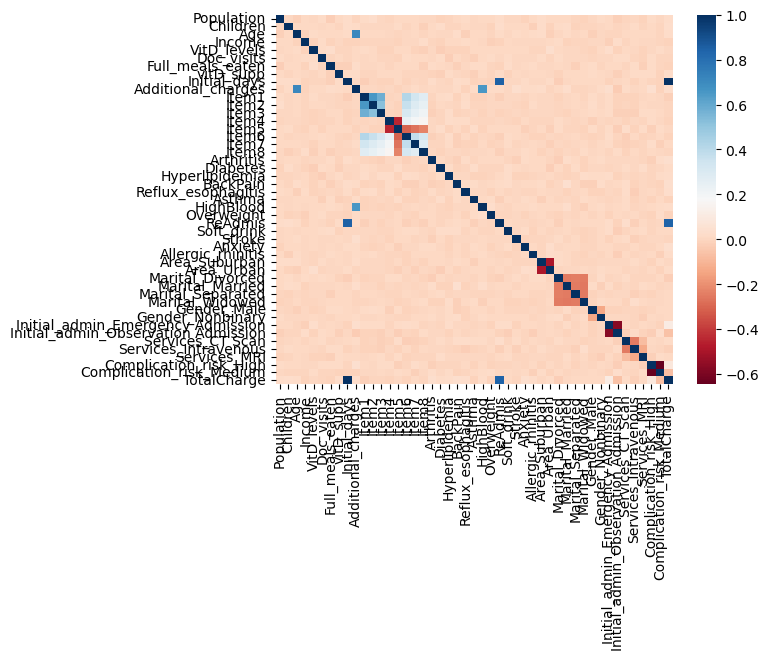

In [27]:
# test for multicolenearity 
corr = df.corr()
display(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')


In [28]:
# find VIF  
df_before = df

X1 = sm.tools.add_constant(df_before)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)


DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                  5.031955e+13
Population                             1.005283e+00
Children                               1.004936e+00
Age                                    9.286960e+00
Income                                 1.004017e+00
VitD_levels                            1.007077e+00
Doc_visits                             1.004641e+00
Full_meals_eaten                       1.006254e+00
vitD_supp                              1.004402e+00
Initial_days                           6.823636e+13
Additional_charges                     1.633063e+01
Item1                                  2.215398e+00
Item2                                  1.896852e+00
Item3                                  1.610754e+00
Item4                                  1.285977e+00
Item5                                  1.411032e+00
Item6                                  1.508722e+00
Item7                                  1.310295e+00
Item8                                  1.209521e+00
Arthritis   

In [29]:
#drop Initial_admin_Emergency Admission
df_after = df.drop(['Initial_admin_Emergency Admission'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                  328.346570
Population                               1.005279
Children                                 1.004850
Age                                      9.285170
Income                                   1.004006
VitD_levels                              1.006986
Doc_visits                               1.004620
Full_meals_eaten                         1.006057
vitD_supp                                1.004395
Initial_days                           109.768571
Additional_charges                      16.325648
Item1                                    2.215395
Item2                                    1.896394
Item3                                    1.610381
Item4                                    1.285976
Item5                                    1.410941
Item6                                    1.508702
Item7                                    1.310272
Item8                                    1.209519
Arthritis                                1.034254


In [30]:
#drop Initial_days   
df_after = df_after.drop(['Initial_days'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                  226.318458
Population                               1.005220
Children                                 1.004842
Age                                      9.157305
Income                                   1.003907
VitD_levels                              1.006354
Doc_visits                               1.004267
Full_meals_eaten                         1.005933
vitD_supp                                1.004098
Additional_charges                      16.092317
Item1                                    2.215335
Item2                                    1.896276
Item3                                    1.610381
Item4                                    1.285976
Item5                                    1.410897
Item6                                    1.508474
Item7                                    1.310272
Item8                                    1.209492
Arthritis                                1.007994
Diabetes                                 1.006928


In [31]:
#drop Additional_charges   
df_after = df_after.drop(['Additional_charges'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                  223.296115
Population                               1.005184
Children                                 1.004481
Age                                      1.004364
Income                                   1.003905
VitD_levels                              1.006201
Doc_visits                               1.004172
Full_meals_eaten                         1.005836
vitD_supp                                1.004072
Item1                                    2.215084
Item2                                    1.896078
Item3                                    1.610165
Item4                                    1.285970
Item5                                    1.410897
Item6                                    1.508470
Item7                                    1.310214
Item8                                    1.209463
Arthritis                                1.007697
Diabetes                                 1.006757
Hyperlipidemia                           1.006031


In [32]:
#define x & y 
x = df_after.drop('TotalCharge', axis =1)
y= df_after[['TotalCharge']]

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(x_train, y_train)

# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)


The intercept for our model is 3.768e+03
----------------------------------------------------------------------------------------------------


In [33]:
# loop through the dictionary and print the data
for coef in zip(x.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

# define our intput
X2 = sm.add_constant(x)

# create a OLS model
model = sm.OLS(y, x)

# fit the data
est = model.fit()

# show summary
est.summary()


The Coefficient for Population is 0.00043
The Coefficient for Children is 8.0
The Coefficient for Age is 0.052
The Coefficient for Income is -0.0003
The Coefficient for VitD_levels is -2.5
The Coefficient for Doc_visits is -8.9
The Coefficient for Full_meals_eaten is -1.3e+01
The Coefficient for vitD_supp is 2.2e+01
The Coefficient for Item1 is -5.1e+01
The Coefficient for Item2 is -5.4
The Coefficient for Item3 is 1.8e+01
The Coefficient for Item4 is -2.8e+01
The Coefficient for Item5 is 7.8
The Coefficient for Item6 is 1.8e+01
The Coefficient for Item7 is 2e+01
The Coefficient for Item8 is 1.2e+01
The Coefficient for Arthritis is 1.3e+02
The Coefficient for Diabetes is 8.8e+01
The Coefficient for Hyperlipidemia is 7.1e+01
The Coefficient for BackPain is 1.2e+02
The Coefficient for Reflux_esophagitis is 1e+02
The Coefficient for Asthma is -9.1
The Coefficient for HighBlood is 6.8e+01
The Coefficient for Overweight is -2.2e+01
The Coefficient for ReAdmis is 3.8e+03
The Coefficient for 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            TotalCharge   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              5367.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:33:22   Log-Likelihood:                         -84818.
No. Observations:               10000   AIC:                                  1.697e+05
Df Residuals:                    9957   BIC:                                  1.700e+05
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Population                              0.0006      0.001      0.784      0.433      -0.001       0.002
Children                               10.1063      5.413      1.867      0.062      -0.505      20.718
Age                                     2.3406      0.560      4.178      0.000       1.242       3.439
Income                                  0.0006      0.000      1.557      0.119      -0.000       0.001
VitD_levels                            75.6846      4.606     16.433      0.000      66.657      84.713
Doc_visits                             69.0411     10.625      6.498      0.000      48.214      89.868
Full_meals_eaten                        1.4816     11.627      0.127      0.899     -21.309      24.272
vitD_supp                              36.3425     18.641      1.950      0.051      -0.198      72.883
Item1                                 -48.2687     16.864     -2.862      0.004     -81.325     -15.212
Item2                                   3.1987     15.563      0.206      0.837     -27.308      33.705
Item3                                  43.0301     14.307      3.008      0.003      14.986      71.074
Item4                                  65.5892     12.032      5.451      0.000      42.004      89.174
Item5                                 141.0612     11.965     11.790      0.000     117.608     164.514
Item6                                  57.4874     13.820      4.160      0.000      30.397      84.578
Item7                                  66.0803     12.952      5.102      0.000      40.692      91.468
Item8                                  62.5870     12.168      5.144      0.000      38.736      86.438
Arthritis                             157.5036     24.442      6.444      0.000     109.592     205.415
Diabetes                              105.2353     26.286      4.003      0.000      53.709     156.761
Hyperlipidemia                         99.2512     24.781      4.005      0.000      50.675     147.827
BackPain                              144.8055     23.830      6.077      0.000      98.093     191.518
Reflux_esophagitis                    132.6574     23.759      5.583      0.000      86.085     179.230
Asthma                                 24.3993     25.849      0.944      0.345     -26.269      75.068
HighBlood                             103.4281     23.833      4.340      0.000      56.711     150.145
Overweight                             40.3392     25.690      1.570      0.116     -10.018      90.696
ReAdmis                              3840.3476     24.308    157.985      0.000    3792.698    3887.997
Soft_drink                              4.1741     26.815      0.156    

In [34]:
#find mean square error
y_pred = regression_model.predict(x)
y_pred

#how close to the regression are the datapoints
mean_squared_error (y, y_pred)


1295705.79368413

In [36]:
#find mean square error
y_pred = regression_model.predict(x)
y_pred

array([[4174.72130978],
       [4136.35887564],
       [3802.43461675],
       ...,
       [8041.51494884],
       [7297.2022647 ],
       [7676.68075735]])

In [37]:
#how close to the regression are the datapoints
mean_squared_error(y, y_pred)

1295705.79368413

<function matplotlib.pyplot.show(close=None, block=None)>

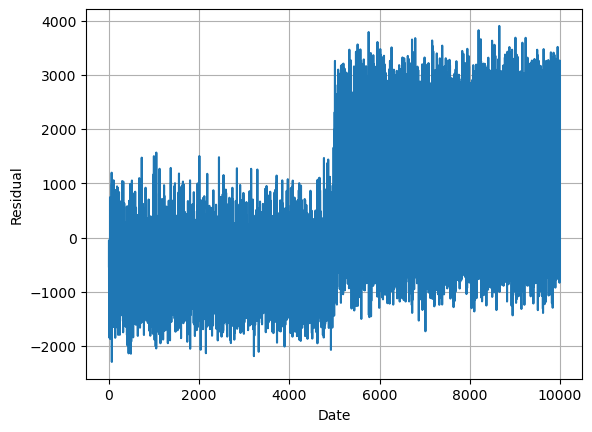

In [38]:
#create residual plot
import matplotlib.pyplot as plt
uhat= est.resid
plt.plot(uhat)
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show